In [29]:
from nst_scraper import nst_on_ice_scraper
import pandas as pd

In [15]:
player_stats_2022_df = nst_on_ice_scraper(fromseason=20222023, thruseason=20222023, startdate='', enddate='')


In [17]:
def filter_players_by_toi(df, min_toi=400):
    """
    Filters the input DataFrame to include only players with a total time on ice (toi) of at least min_toi.

    Parameters:
        df (pd.DataFrame): The DataFrame containing player statistics.
        min_toi (int, optional): The minimum total time on ice required to include a player. Defaults to 400.

    Returns:
        pd.DataFrame: A filtered DataFrame with players having toi >= min_toi.
    """
    filtered_df = df[df['toi'] >= min_toi]
    return filtered_df


In [18]:
player_stats_2022_df = filter_players_by_toi(player_stats_2022_df, min_toi=400)
player_stats_2022_df

,player,team,position,gp,toi,goals,total_assists,first_assists,second_assists,total_points,...,misconduct,penalties_drawn,giveaways,takeaways,hits,hits_taken,shots_blocked,faceoffs_won,faceoffs_lost,faceoffs_%
0,Eric Staal,FLA,C,72,816.866667,12,14,8,6,26,...,0,6,30,25,25,40,31,278,284,49.47
1,Ryan Suter,DAL,D,82,1363.850000,3,17,7,10,20,...,0,6,35,20,69,48,84,0,0,-
2,Jeff Carter,PIT,C,79,833.633333,7,8,3,5,15,...,0,5,24,20,73,71,36,415,279,59.80
3,Zach Parise,NYI,L,82,1007.100000,12,9,6,3,21,...,0,10,20,14,82,72,51,6,13,31.58
4,Brent Burns,CAR,D,82,1390.983333,12,18,13,5,30,...,0,8,36,39,34,40,48,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Arber Xhekaj,MTL,D,51,713.733333,3,7,5,2,10,...,1,15,33,14,155,69,43,0,0,-
936,Juraj Slafkovsky,MTL,L,39,421.033333,3,5,1,4,8,...,1,5,12,12,50,44,23,5,5,50.00
939,Nick Blankenburg,CBJ,D,36,580.766667,3,5,3,2,8,...,0,4,11,10,51,46,39,0,0,-
943,Marcus Bjork,CBJ,D,33,486.833333,2,2,1,1,4,...,1,3,12,2,43,36,35,0,0,-


In [19]:
def calculate_ixg60(df):
    """
    Calculates individual expected goals per 60 minutes (ixG/60) for each player.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing player statistics with 'ixg' and 'toi' columns
        
    Returns:
        pd.DataFrame: Original DataFrame with new 'ixg60' column added
    """
    # Create copy of dataframe to avoid modifying original
    df = df.copy()
    
    # Calculate ixG/60 = (ixg / toi) * 60
    df['ixg60'] = (df['ixg'] / df['toi']) * 60
    
    return df

In [20]:
player_stats_2022_df = calculate_ixg60(player_stats_2022_df)
player_stats_2022_df


,player,team,position,gp,toi,goals,total_assists,first_assists,second_assists,total_points,...,penalties_drawn,giveaways,takeaways,hits,hits_taken,shots_blocked,faceoffs_won,faceoffs_lost,faceoffs_%,ixg60
0,Eric Staal,FLA,C,72,816.866667,12,14,8,6,26,...,6,30,25,25,40,31,278,284,49.47,0.749204
1,Ryan Suter,DAL,D,82,1363.850000,3,17,7,10,20,...,6,35,20,69,48,84,0,0,-,0.172453
2,Jeff Carter,PIT,C,79,833.633333,7,8,3,5,15,...,5,24,20,73,71,36,415,279,59.80,0.822664
3,Zach Parise,NYI,L,82,1007.100000,12,9,6,3,21,...,10,20,14,82,72,51,6,13,31.58,1.072386
4,Brent Burns,CAR,D,82,1390.983333,12,18,13,5,30,...,8,36,39,34,40,48,0,0,-,0.289436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Arber Xhekaj,MTL,D,51,713.733333,3,7,5,2,10,...,15,33,14,155,69,43,0,0,-,0.177377
936,Juraj Slafkovsky,MTL,L,39,421.033333,3,5,1,4,8,...,5,12,12,50,44,23,5,5,50.00,0.460296
939,Nick Blankenburg,CBJ,D,36,580.766667,3,5,3,2,8,...,4,11,10,51,46,39,0,0,-,0.233484
943,Marcus Bjork,CBJ,D,33,486.833333,2,2,1,1,4,...,3,12,2,43,36,35,0,0,-,0.096131


In [23]:
def process_player_stats(season, startdate='', enddate=''):
    """
    Processes player statistics for a given season by scraping data, filtering players by TOI,
    and calculating individual expected goals per 60 minutes (ixG/60).

    Parameters:
        season (int): The season year (e.g., 20222023).
        startdate (str, optional): The start date for data scraping. Defaults to ''.
        enddate (str, optional): The end date for data scraping. Defaults to ''.

    Returns:
        pd.DataFrame: A DataFrame containing the processed player statistics with the 'ixg60' column.
    """
    # Scrape player statistics for the given season
    df = nst_on_ice_scraper(
        fromseason=season,
        thruseason=season,
        startdate=startdate,
        enddate=enddate
    )
    
    # Filter players based on minimum TOI
    filtered_df = filter_players_by_toi(df, min_toi=400)
    
    # Calculate individual expected goals per 60 minutes
    ixg60_df = calculate_ixg60(filtered_df)
    
    return ixg60_df

In [27]:
player_stats_2023_df = process_player_stats(20232024)
player_stats_2023_df

,player,team,position,gp,toi,goals,total_assists,first_assists,second_assists,total_points,...,penalties_drawn,giveaways,takeaways,hits,hits_taken,shots_blocked,faceoffs_won,faceoffs_lost,faceoffs_%,ixg60
0,Ryan Suter,DAL,D,82,1403.833333,2,14,6,8,16,...,0,28,14,75,92,86,0,0,-,0.159848
1,Jeff Carter,PIT,C,72,664.900000,5,3,1,2,8,...,3,16,16,75,32,25,169,87,66.02,0.528801
3,Brent Burns,CAR,D,82,1276.683333,5,12,5,7,17,...,5,43,30,34,33,72,0,0,-,0.223235
4,Corey Perry,"CHI, EDM",R,54,600.266667,9,7,4,3,16,...,14,17,15,42,66,17,0,1,0.00,0.756664
5,Joe Pavelski,DAL,C,82,1085.316667,12,25,14,11,37,...,19,51,19,70,45,61,299,281,51.55,0.804374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Andrei Kuzmenko,"CGY, VAN",L,72,815.650000,14,13,9,4,27,...,15,21,24,12,68,16,1,0,100.00,0.807699
907,Connor Bedard,CHI,C,68,1043.150000,16,18,12,6,34,...,20,46,37,54,68,25,190,300,38.78,0.903609
908,Zach Benson,BUF,L,71,886.483333,10,16,10,6,26,...,13,18,30,35,90,30,4,10,28.57,0.733009
910,Leo Carlsson,ANA,C,55,788.383333,7,8,4,4,15,...,16,29,37,24,36,22,167,317,34.50,0.608841


In [28]:
# export league stats with ixg60 to csv
player_stats_2023_df.to_csv(r'data/player_stats_2023_ixg60.csv', index=False)

In [31]:
player_stats_2023_df = pd.read_csv(r'data/player_stats_2023_ixg60.csv')
player_stats_2023_df.head()

,player,team,position,gp,toi,goals,total_assists,first_assists,second_assists,total_points,...,penalties_drawn,giveaways,takeaways,hits,hits_taken,shots_blocked,faceoffs_won,faceoffs_lost,faceoffs_%,ixg60
0,Ryan Suter,DAL,D,82,1403.833333,2,14,6,8,16,...,0,28,14,75,92,86,0,0,-,0.159848
1,Jeff Carter,PIT,C,72,664.900000,5,3,1,2,8,...,3,16,16,75,32,25,169,87,66.02,0.528801
2,Brent Burns,CAR,D,82,1276.683333,5,12,5,7,17,...,5,43,30,34,33,72,0,0,-,0.223235
3,Corey Perry,"CHI, EDM",R,54,600.266667,9,7,4,3,16,...,14,17,15,42,66,17,0,1,0.00,0.756664
4,Joe Pavelski,DAL,C,82,1085.316667,12,25,14,11,37,...,19,51,19,70,45,61,299,281,51.55,0.804374


In [32]:
player_stats_2022_df = pd.read_csv(r'data/player_stats_2022_ixg60.csv')
player_stats_2022_df.head()

,player,team,position,gp,toi,goals,total_assists,first_assists,second_assists,total_points,...,penalties_drawn,giveaways,takeaways,hits,hits_taken,shots_blocked,faceoffs_won,faceoffs_lost,faceoffs_%,ixg60
0,Eric Staal,FLA,C,72,816.866667,12,14,8,6,26,...,6,30,25,25,40,31,278,284,49.47,0.749204
1,Ryan Suter,DAL,D,82,1363.850000,3,17,7,10,20,...,6,35,20,69,48,84,0,0,-,0.172453
2,Jeff Carter,PIT,C,79,833.633333,7,8,3,5,15,...,5,24,20,73,71,36,415,279,59.80,0.822664
3,Zach Parise,NYI,L,82,1007.100000,12,9,6,3,21,...,10,20,14,82,72,51,6,13,31.58,1.072386
4,Brent Burns,CAR,D,82,1390.983333,12,18,13,5,30,...,8,36,39,34,40,48,0,0,-,0.289436


In [35]:
def compare_ixg60(player_stats_2022_df, player_stats_2023_df, drop_missing=True):
    """
    Compares ixg60 values of players between two seasons and returns a combined DataFrame.
    
    Parameters:
        player_stats_2022_df (pd.DataFrame): DataFrame containing 2022 player statistics with 'player' and 'ixg60' columns.
        player_stats_2023_df (pd.DataFrame): DataFrame containing 2023 player statistics with 'player' and 'ixg60' columns.
        drop_missing (bool, optional): If True, drops players with missing ixg60 in either season. Defaults to True.
    
    Returns:
        pd.DataFrame: A DataFrame with players and their ixg60 values from both 2022 and 2023 seasons.
    """
    # Select relevant columns
    df_2022 = player_stats_2022_df[['player', 'ixg60']].copy()
    df_2023 = player_stats_2023_df[['player', 'ixg60']].copy()
    
    # Rename ixg60 columns to distinguish between seasons
    df_2022.rename(columns={'ixg60': 'ixg60_2022'}, inplace=True)
    df_2023.rename(columns={'ixg60': 'ixg60_2023'}, inplace=True)
    
    # Merge the two DataFrames on 'player'
    combined_df = pd.merge(df_2022, df_2023, on='player', how='outer')
    
    if drop_missing:
        # Drop players with missing ixg60 in either season
        combined_df.dropna(subset=['ixg60_2022', 'ixg60_2023'], inplace=True)
    else:
        # Fill NaN values with zeros or handle as desired
        combined_df.fillna(0, inplace=True)
    
    return combined_df

In [36]:
compare_ixg60(player_stats_2022_df, player_stats_2023_df)

,player,ixg60_2022,ixg60_2023
0,A.J. Greer,0.785253,0.635130
1,Aaron Ekblad,0.333995,0.218219
2,Adam Boqvist,0.208875,0.223706
5,Adam Fox,0.282638,0.267171
6,Adam Henrique,0.794220,0.737922
...,...,...,...
737,Yegor Sharangovich,0.912813,0.718324
741,Zach Bogosian,0.166884,0.138002
742,Zach Hyman,1.212779,1.516865
745,Zach Whitecloud,0.231449,0.131336


In [38]:
ixg60_df = compare_ixg60

/var/folders/12/l8k43kld39302mkv45jsx7680000gn/T/ipykernel_5282/1073838797.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(


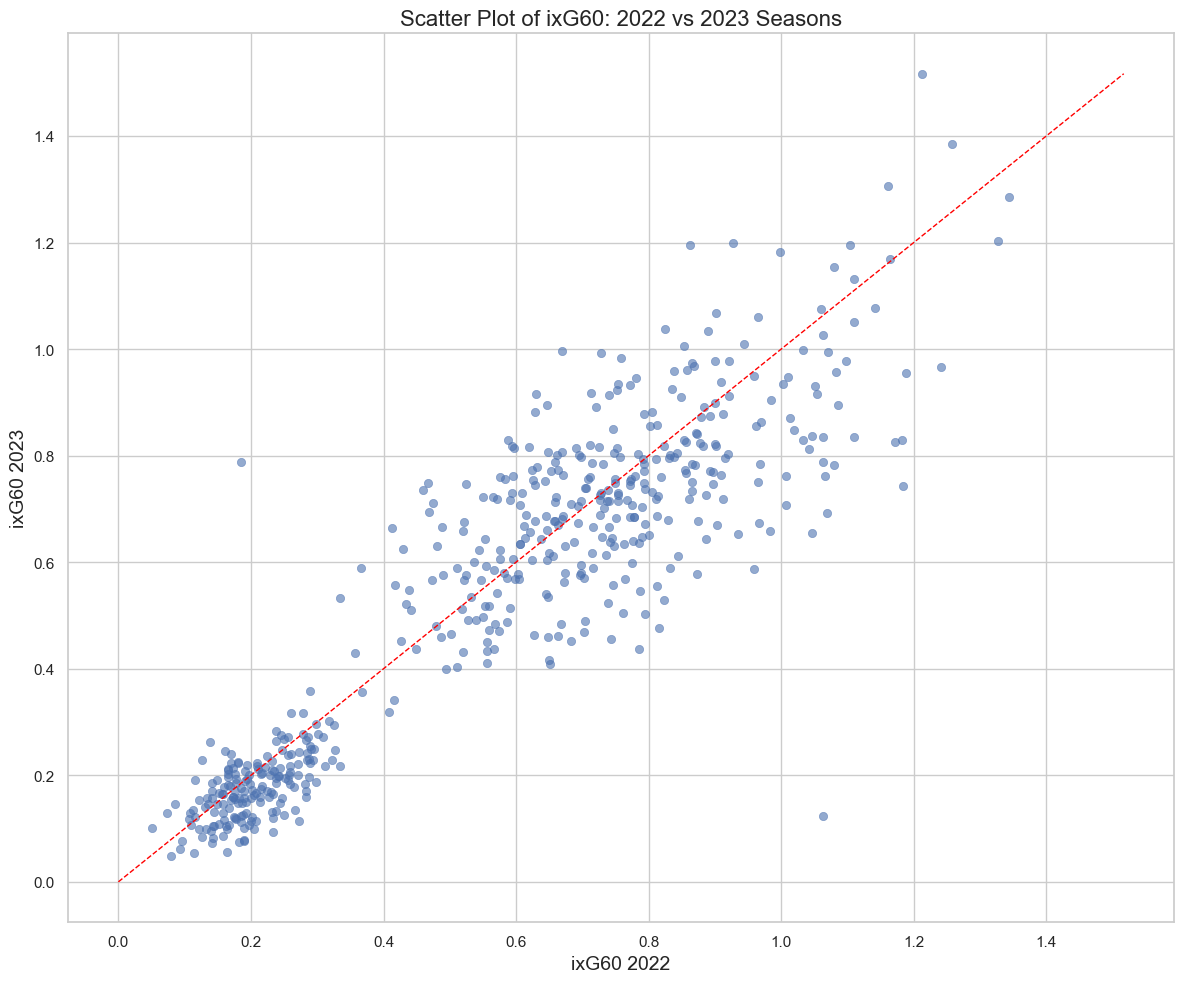

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ixg60_scatter(ixg60_df, show_legend=False, show_labels=False):
    """
    Creates a scatter plot comparing ixg60 values between 2022 and 2023 seasons.
    
    Parameters:
        ixg60_df (pd.DataFrame): DataFrame containing 'ixg60_2022' and 'ixg60_2023' columns.
        show_legend (bool, optional): If True, displays the legend. Defaults to False.
        show_labels (bool, optional): If True, annotates each point with the player's name. Defaults to False.
    
    Returns:
        None: Displays the scatter plot.
    """
    plt.figure(figsize=(12, 10))
    sns.set(style="whitegrid")
    
    # Create scatter plot without hue to reduce clutter
    scatter = sns.scatterplot(
        data=ixg60_df,
        x='ixg60_2022',
        y='ixg60_2023',
        # hue='player',  # Removed to simplify the plot
        palette='viridis',
        alpha=0.6,
        edgecolor=None
    )
    
    # Add a diagonal line for reference
    max_val = max(ixg60_df['ixg60_2022'].max(), ixg60_df['ixg60_2023'].max())
    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=1)
    
    # Set plot labels and title
    plt.xlabel('ixG60 2022', fontsize=14)
    plt.ylabel('ixG60 2023', fontsize=14)
    plt.title('Scatter Plot of ixG60: 2022 vs 2023 Seasons', fontsize=16)
    
    # Optionally annotate players
    if show_labels:
        for _, row in ixg60_df.iterrows():
            plt.text(row['ixg60_2022'] + 0.01, row['ixg60_2023'] + 0.01, row['player'],
                     horizontalalignment='left', size='small', color='black', alpha=0.7)
    
    # Optionally show legend
    if show_legend:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.tight_layout()
    plt.show()

# Usage Example
plot_ixg60_scatter(ixg60_df, show_legend=False, show_labels=False)

In [43]:
def perform_polynomial_regression(ixg60_df, degree=2):
    """
    Performs polynomial regression on ixg60 data and plots the best fit line.
    
    Parameters:
        ixg60_df (pd.DataFrame): DataFrame containing 'ixg60_2022' and 'ixg60_2023' columns.
        degree (int, optional): Degree of the polynomial. Defaults to 2.
    
    Returns:
        model (sklearn.linear_model.LinearRegression): Fitted regression model.
        poly_features (sklearn.preprocessing.PolynomialFeatures): Polynomial features transformer.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import mean_squared_error, r2_score

    # Prepare the data
    X = ixg60_df['ixg60_2022'].values.reshape(-1, 1)
    y = ixg60_df['ixg60_2023'].values

    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict using the model
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='ixg60_2022', y='ixg60_2023', data=ixg60_df, alpha=0.6, label='Data Points')
    
    # Generate a sequence of values for a smooth curve
    X_sequence = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_seq_poly = poly.transform(X_sequence)
    y_seq_pred = model.predict(X_seq_poly)
    
    plt.plot(X_sequence, y_seq_pred, color='red', label=f'Polynomial Degree {degree}')
    plt.xlabel('ixG60 2022', fontsize=14)
    plt.ylabel('ixG60 2023', fontsize=14)
    plt.title('Polynomial Regression: ixG60 2022 vs 2023', fontsize=16)
    plt.legend()
    plt.show()

    return model, poly

Polynomial Degree: 2
Mean Squared Error: 0.0152
R-squared: 0.8364


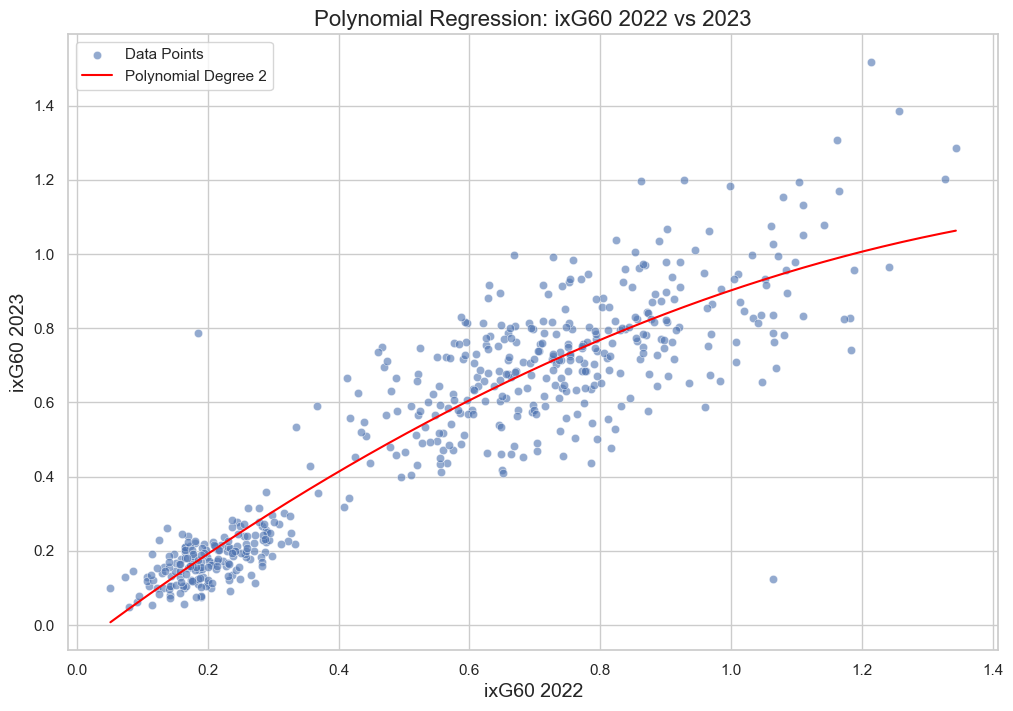

In [44]:
# Perform polynomial regression with degree 2
model_degree_2, poly_degree_2 = perform_polynomial_regression(ixg60_df, degree=2)